### PREPROCESSING & EDA

#### Importing Libraries & Data
#### Dealing with Duplicates and Nan
#### Looking at correlations(相關性)
#### Data Normalization (Plots & Tests)

### MODELING

#### Baseline Models with 10-Folds CV
#### Best Model (RandomGridSearch)
#### Prediction
#### Submission

In [2237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from scipy.stats import norm
from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action="ignore")

In [2238]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
test_data=test_data.drop("Id",axis=1)

In [2239]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2240]:
train_data.shape,test_data.shape

((1460, 81), (1459, 79))

In [2241]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2242]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

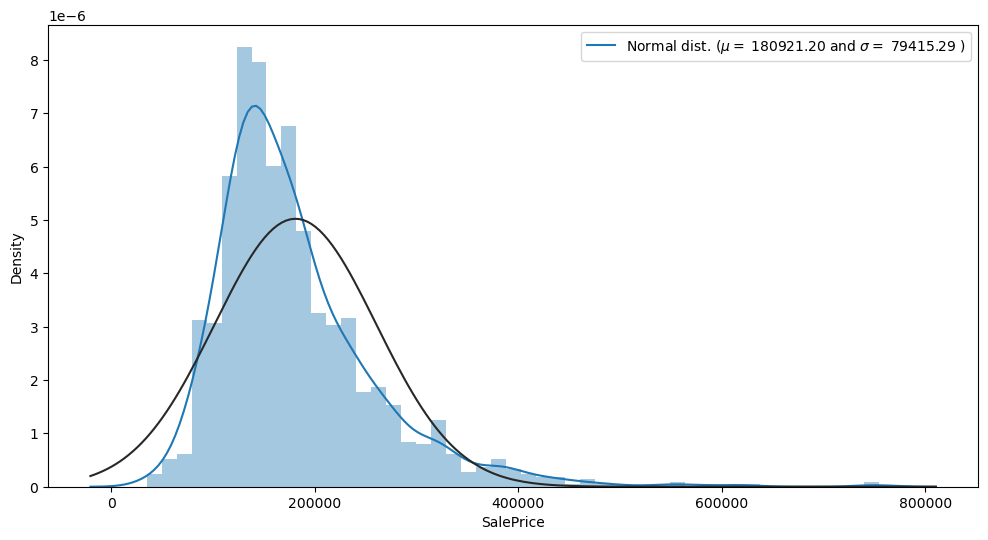

In [2243]:
#(mean,std)   去.info看
(mu,sigma)=norm.fit(train_data['SalePrice'])
# mu
plt.figure(figsize=(12,6))
sns.distplot(train_data['SalePrice'],kde=True,hist=True,fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')

In [2244]:
train_data = train_data[train_data.GrLivArea < 4500]

In [2245]:
print("Skewness: %f" % abs(train_data['SalePrice']).skew())
print("Kurtosis: %f" % abs(train_data['SalePrice']).kurt())

Skewness: 1.881296
Kurtosis: 6.523067


In [2246]:
df=train_data.append(test_data,ignore_index=False).reset_index()
df=df.drop("index",axis=1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1458.0,730.251715,421.601532,1.0,365.25,730.5,1094.75,1460.0
MSSubClass,2917.0,57.135756,42.532140,20.0,20.00,50.0,70.00,190.0
LotFrontage,2431.0,69.180584,22.791719,21.0,59.00,68.0,80.00,313.0
LotArea,2917.0,10139.439150,7807.036512,1300.0,7476.00,9452.0,11556.00,215245.0
OverallQual,2917.0,6.086390,1.406704,1.0,5.00,6.0,7.00,10.0
OverallCond,2917.0,5.564964,1.113414,1.0,5.00,5.0,6.00,9.0
YearBuilt,2917.0,1971.287967,30.286991,1872.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,2917.0,1984.248200,20.892257,1950.0,1965.00,1993.0,2004.00,2010.0
MasVnrArea,2894.0,101.733587,178.510291,0.0,0.00,0.0,164.00,1600.0
BsmtFinSF1,2916.0,439.015432,444.182329,0.0,0.00,368.0,733.00,4010.0


In [2247]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

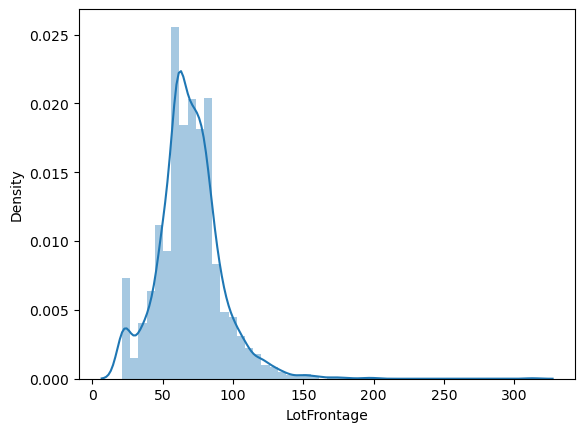

In [2248]:
sns.distplot(df.LotFrontage)

In [2249]:
df.loc[df.LotFrontage.isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8.0,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
12,13.0,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000.0
14,15.0,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000.0
16,17.0,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000.0
24,25.0,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,NaN,20,RL,NaN,11088,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2848,NaN,60,RL,NaN,21533,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,NaN
2898,NaN,20,RL,NaN,50102,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Alloca,NaN
2899,NaN,20,RL,NaN,8098,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN


In [2250]:
df.loc[df.LotFrontage.isnull()==True,'LotFrontage']=round(df.LotFrontage.mean(),2)
df.loc[12]

Id                   13.0
MSSubClass             20
MSZoning               RL
LotFrontage         69.18
LotArea             12968
                   ...   
MoSold                  9
YrSold               2008
SaleType               WD
SaleCondition      Normal
SalePrice        144000.0
Name: 12, Length: 81, dtype: object

## 處理缺失值

In [2251]:
a=df.isnull().sum()
for value in a.items():
    if value[1]>0:
        print(value)

('Id', 1459)
('MSZoning', 4)
('Alley', 2719)
('Utilities', 2)
('Exterior1st', 1)
('Exterior2nd', 1)
('MasVnrType', 24)
('MasVnrArea', 23)
('BsmtQual', 81)
('BsmtCond', 82)
('BsmtExposure', 82)
('BsmtFinType1', 79)
('BsmtFinSF1', 1)
('BsmtFinType2', 80)
('BsmtFinSF2', 1)
('BsmtUnfSF', 1)
('TotalBsmtSF', 1)
('Electrical', 1)
('BsmtFullBath', 2)
('BsmtHalfBath', 2)
('KitchenQual', 1)
('Functional', 2)
('FireplaceQu', 1420)
('GarageType', 157)
('GarageYrBlt', 159)
('GarageFinish', 159)
('GarageCars', 1)
('GarageArea', 1)
('GarageQual', 159)
('GarageCond', 159)
('PoolQC', 2908)
('Fence', 2346)
('MiscFeature', 2812)
('SaleType', 1)
('SalePrice', 1459)


In [2252]:
#缺失大於2000
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df.shape

(2917, 77)

In [2253]:
df['BsmtQual']=df['BsmtQual'].fillna('NA')
df['BsmtCond']=df['BsmtCond'].fillna('NA')
df['BsmtExposure']=df['BsmtExposure'].fillna('NA')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('NA')

In [2254]:
df['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       247
BrkCmn       25
Name: MasVnrType, dtype: int64

In [2255]:
#1742 None 缺值補none
df.loc[df['MasVnrType'].isnull()==True,'MasVnrType']='None'

In [2256]:
df['MasVnrArea'].describe()

count    2894.000000
mean      101.733587
std       178.510291
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [2257]:
#一半都是0 缺值補0
df.loc[df.MasVnrArea.isnull()==True,'MasVnrArea']=0.0
# df['MasVnrArea'].isnull().sum()

In [2258]:
df['GarageType']=df['GarageType'].fillna('NA')
df['GarageFinish']=df['GarageFinish'].fillna('NA')
df['GarageQual']=df['GarageQual'].fillna('NA')
df['GarageCond']=df['GarageCond'].fillna('NA')

In [2259]:
df['GarageYrBlt'].median()
df.loc[df['GarageYrBlt'].isnull()==True,'GarageYrBlt']=1979.0

In [2260]:
df.Electrical.value_counts()
df.loc[df['Electrical'].isnull()==True,'Electrical']='SBrkr'

In [2261]:
df.loc[df['FireplaceQu'].isnull()==True,'FireplaceQu']='NA'

In [2262]:
a=df.isnull().sum()
for value in a.items():
    if value[1]>0:
        print(value)

('Id', 1459)
('MSZoning', 4)
('Utilities', 2)
('Exterior1st', 1)
('Exterior2nd', 1)
('BsmtFinSF1', 1)
('BsmtFinSF2', 1)
('BsmtUnfSF', 1)
('TotalBsmtSF', 1)
('BsmtFullBath', 2)
('BsmtHalfBath', 2)
('KitchenQual', 1)
('Functional', 2)
('GarageCars', 1)
('GarageArea', 1)
('SaleType', 1)
('SalePrice', 1459)


In [2263]:
df_train=df.drop("SalePrice",axis=1)
rem=df[["Id","SalePrice"]]
df_train=df_train.fillna(0)
df=pd.merge(df_train,rem,how="left")
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 77, dtype: int64

## encodeing

In [2264]:
data_object = df.select_dtypes(include = "object").columns
print (data_object)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [2265]:
from sklearn.preprocessing import LabelEncoder

for features in data_object:
    df[features] = LabelEncoder().fit_transform(df[features].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 2916
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2917 non-null   float64
 1   MSSubClass     2917 non-null   int64  
 2   MSZoning       2917 non-null   int32  
 3   LotFrontage    2917 non-null   float64
 4   LotArea        2917 non-null   int64  
 5   Street         2917 non-null   int32  
 6   LotShape       2917 non-null   int32  
 7   LandContour    2917 non-null   int32  
 8   Utilities      2917 non-null   int32  
 9   LotConfig      2917 non-null   int32  
 10  LandSlope      2917 non-null   int32  
 11  Neighborhood   2917 non-null   int32  
 12  Condition1     2917 non-null   int32  
 13  Condition2     2917 non-null   int32  
 14  BldgType       2917 non-null   int32  
 15  HouseStyle     2917 non-null   int32  
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

In [2266]:
x=df.drop(['Id','SalePrice'],axis=1) 

In [2267]:
scaled_x=MinMaxScaler().fit_transform(x)

In [2268]:
train_df = df[df['SalePrice'].notnull()].reset_index(drop=True)
test_df = df[df['SalePrice'].isnull()]
# y=train_df['SalePrice']
# train_df=train_df.drop(["Id","SalePrice"],axis=1)
# test_df=test_df.drop(["Id","SalePrice"],axis=1)

In [2269]:
y = train_df['SalePrice'] 
X = train_df.drop(["Id", "SalePrice"], axis=1)

y_test = test_df['SalePrice'] 
X_test = test_df.drop(["Id", "SalePrice"], axis=1)

## Model

In [2270]:
# X_train,X_test,y_train,y_test = train_test_split(train_df,y,test_size=0,random_state=42)

In [2275]:
XGB=XGBRegressor(n_estimators=1000).fit(X,y)

([<matplotlib.axis.YTick at 0x1e7c6469d30>,
 [Text(0, 0, 'Utilities'),
  Text(0, 1, 'Street'),
  Text(0, 2, 'GarageFinish'),
  Text(0, 3, 'BldgType'),
  Text(0, 4, 'MSSubClass'),
  Text(0, 5, 'ExterQual'),
  Text(0, 6, 'Exterior2nd'),
  Text(0, 7, 'RoofStyle'),
  Text(0, 8, 'BsmtCond'),
  Text(0, 9, 'FireplaceQu'),
  Text(0, 10, 'Electrical'),
  Text(0, 11, 'YrSold'),
  Text(0, 12, 'HouseStyle'),
  Text(0, 13, 'ScreenPorch'),
  Text(0, 14, 'LotConfig'),
  Text(0, 15, 'Foundation'),
  Text(0, 16, 'LotFrontage'),
  Text(0, 17, 'BsmtFinType2'),
  Text(0, 18, 'BsmtHalfBath'),
  Text(0, 19, 'WoodDeckSF'),
  Text(0, 20, 'BsmtUnfSF'),
  Text(0, 21, 'MiscVal'),
  Text(0, 22, 'MoSold'),
  Text(0, 23, 'EnclosedPorch'),
  Text(0, 24, 'ExterCond'),
  Text(0, 25, 'LowQualFinSF'),
  Text(0, 26, 'MasVnrArea'),
  Text(0, 27, 'MasVnrType'),
  Text(0, 28, 'BsmtFinType1'),
  Text(0, 29, 'Neighborhood'),
  Text(0, 30, 'BedroomAbvGr'),
  Text(0, 31, 'BsmtFinSF2'),
  Text(0, 32, 'SaleType'),
  Text(0, 33, '

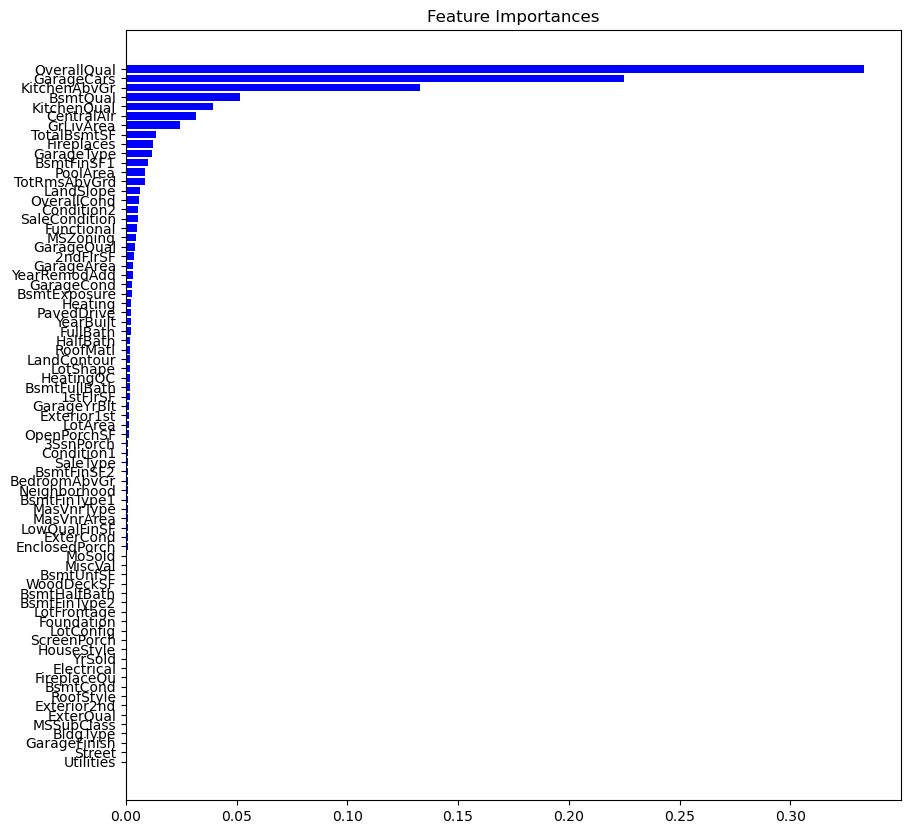

In [2276]:
importances = XGB.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices] , color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])

In [2277]:
xtest_XGB_pred=XGB.predict(X_test)

In [2278]:
my_submission = pd.DataFrame({'Id': test_df.index+3, 'SalePrice': xtest_XGB_pred})

In [2279]:
my_submission

,Id,SalePrice
0,1461,122317.890625
1,1462,146349.125000
2,1463,182268.062500
3,1464,192913.906250
4,1465,189655.375000
...,...,...
1454,2915,86955.085938
1455,2916,82764.429688
1456,2917,174096.109375
1457,2918,108190.367188


In [2280]:
my_submission.to_csv('submission.csv', index=False)